In [93]:
import random
import copy
import math
import matplotlib.pyplot as plt

In [114]:
POPULATION_SIZE =20
CITIES_SIZE = 20
TOUR_SIZE =21
NUM_EXECUTION =1000
population = []
x = []
y = []

In [115]:
tour = [[0 for x in range(TOUR_SIZE)] for y in range(TOUR_SIZE)]
dCidade = [[0 for x in range(POPULATION_SIZE)] for y in range(POPULATION_SIZE)]
distances = [0 for x in range(POPULATION_SIZE)]
parentsOne = None
parentsTwo = None
costByExecution = []

In [116]:
def generateFirstPopulation():
    for _ in range(1, POPULATION_SIZE + 1):
        generatePossiblePath()

In [117]:
def  generatePossiblePath():
    path = []
    for _ in range(1, CITIES_SIZE + 1):
        x = random.randint(1, 20)
        while(NumberExistsInPath(path, x)):
            x = random.randint(1,20)
        path.append(x)
    population.append(path)
    #print()

In [118]:
def NumberExistsInPath(path, num):
    for i in path:
        if i == num:
            return True
    return False

In [119]:
#generatePossiblePath()
#population

In [120]:
#generateFirstPopulation()
#population

In [121]:
def generateXandY():
    for _ in range(CITIES_SIZE):
        randomNum  = random.random()
        randomNum = round(randomNum, 2)
        x.append(randomNum)
        
        randomNum  = random.random()
        randomNum = round(randomNum, 2)
        y.append(randomNum)
    #print(x,y)

In [122]:
#generateXandY()

In [123]:
def generateTour():
    global tour
    tour = copy.deepcopy(population)
    for ways in tour:
        first = ways[0]
        ways.append(first)

In [124]:
#generateTour()


In [125]:
#tour

In [126]:
#population

In [127]:
def calculateDistances():
    global distances
    distances = [0 for x in range(CITIES_SIZE)]
    for i in range(len(population)):
        for j in range(len(population[i])):
            firstPos = 19 if tour[i][j] == 20 else tour[i][j]
            secondPos = 19 if tour[i][j+1] == 20 else tour[i][j+1]
            distances[i] += round(dCidade[firstPos][secondPos], 4)
    dict_dist = {i:distances[i] for i in range(0, len(distances))}
    distances = copy.deepcopy(dict_dist)
    return sorted(distances.items(), key=lambda kv: kv[1])

In [128]:
def fitnessFunction():
    for i in range(len(population)):
        for j in range(len(population)):
            dCidade[i][j] = round(math.sqrt(((x[i]-x[j])**2)+ ((y[i]-y[j])**2)),4 )
    return calculateDistances()

In [129]:
def rouletteFunction(sorted_x):
    global parentsOne
    global parentsTwo
    arr = []
    rouletteArr = []
    for i in range(10):
        arr.append(sorted_x[i][0])
    for j in range(len(arr)):
        for _ in range(10 - j):
            rouletteArr.append(arr[j])
    parentsOne = createParents(rouletteArr)
    parentsTwo = createParents(rouletteArr)

In [130]:
def createParents(rouletteArr):
    parentArr = []
    for _ in range(5):
        parentArr.append(rouletteArr[random.randint(0,54)])
    return parentArr

In [131]:
def mutate(matrix):
    for i in range(0, len(matrix)):
        for _ in range(0, len(matrix[i])):
            ranNum = random.randint(1,100)
            if ranNum >= 1 and ranNum <= 5:
                indexOne = random.randint(0,19)
                indexTwo = random.randint(0,19)
                auxOne = matrix[i][indexOne]
                auxTwo = matrix[i][indexTwo]
                matrix[i][indexOne] = auxTwo
                matrix[i][indexTwo] = auxOne

In [132]:
def hasDuplicity(auxArray, usedIndexes):
    for i in range(len(auxArray)):
        for j in range(i, len(auxArray)):
            if i != j and auxArray[i] == auxArray[j]:
                if i in usedIndexes:
                    return j
                else:
                    return i
    return -1

def doCycle(sorted_x):
    global population
    children = []
    
    for i in range(5):
        parentsOneAux = parentsOne[i]
        parentsTwoAux = parentsTwo[i]
        usedIndexes = []
        
        randomIndexInsidecromosom = random.randint(0, POPULATION_SIZE - 1)
        
        usedIndexes.append(randomIndexInsidecromosom)
        
        childOne = copy.deepcopy(population[parentsOneAux])
        childTwo = copy.deepcopy(population[parentsTwoAux])
        
        valAuxOne = childOne[randomIndexInsidecromosom]
        valAuxTwo = childTwo[randomIndexInsidecromosom]
        
        childOne[randomIndexInsidecromosom] = valAuxTwo
        childTwo[randomIndexInsidecromosom] = valAuxOne
        
        
        while(hasDuplicity(childOne,usedIndexes ) != -1):
            newIndex = hasDuplicity(childOne,usedIndexes)
            usedIndexes.append(newIndex)
            
            valAuxOne = childOne[newIndex]
            valAuxTwo = childTwo[newIndex]
        
            childOne[newIndex] = valAuxTwo
            childTwo[newIndex] = valAuxOne
            
        children.append(childOne)
        children.append(childTwo)
        
    mutate(children)
        
    tempPop = copy.deepcopy(population)
        
    for i in range(10):
        population[i] = copy.deepcopy(tempPop[sorted_x[i][0]])
            
    for j in range(10, POPULATION_SIZE):
        population[j] = copy.deepcopy(children[j - 10])

Total Polulation: 20
Mutation Probability: 5%
Best Route: [3, 14, 9, 10, 13, 11, 19, 20, 12, 16, 5, 18, 8, 2, 4, 1, 15, 6, 17, 7]


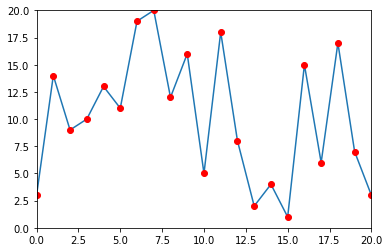

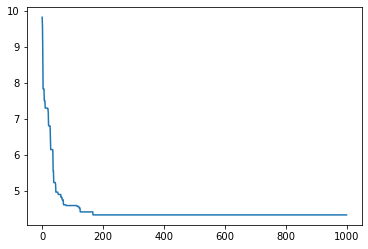

In [133]:
def main():
    generateFirstPopulation()
    generateXandY()
    generateTour()
    
    for _ in range(NUM_EXECUTION):
        sorted_x = fitnessFunction()
        rouletteFunction(sorted_x)
        doCycle(sorted_x)
        generateTour()
        costByExecution.append(sorted_x[0][1])
        
    sorted_x = fitnessFunction()
        
    print('Total Polulation: %s' % (POPULATION_SIZE))
    print('Mutation Probability: 5%')
    #print('Number of cities: %s' % sorted_x[0][1])
    print('Best Route: %s' % population[0])
        
        
    plt.plot(tour[0])
    plt.plot(tour[0], 'ro')
    plt.axis([0, 20, 0, 20])
    plt.show()
        
    plt.plot(costByExecution)
    plt.show()
        
        
if __name__ == "__main__":
    main()      